In [1]:
# Importing the important libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud , STOPWORDS
import emoji
import re

In [2]:
# Reading the data

g_chat=pd.read_csv("WhatsApp Chat.txt",encoding="latin-1",sep="\t")

In [3]:
# taking columns from 1st indexed row. 

g_chat=g_chat.iloc[1:,:]

In [4]:
# Extracting date time user and message from the data.

g_chat["Date"]=g_chat.iloc[:,0].str.split(",").str[0].str.strip()
g_chat["time"]=g_chat.iloc[:,0].str.split("-").str[0].str.split(",").str[1].str.split(":").str[0].str.strip()
g_chat["user"]=g_chat.iloc[:,0].str.split(",").str[1].str.split("-").str[1].str.split(":").str[0].str.strip()
g_chat["message"]=g_chat.iloc[:,0].str.split(":").str[-1].str.strip()

In [5]:
# Dropping the 1st column from g_chat

g_chat=g_chat.drop(g_chat.columns[0],axis=1)

In [7]:
# Extracting the date from the data

g_chat["Date"]=g_chat["Date"].str.strip()
g_chat["Date"]=g_chat["Date"].str.extract(r"(\d{2}/\d{2}/\d{2})").dropna(thresh=1)

In [8]:
# Filling the null values using fillna method of backfill

g_chat["Date"].fillna(method="bfill",inplace=True)

In [9]:
# Converting the date column to datetime and segregating the date . day and month

g_chat["Date"]=pd.to_datetime(g_chat["Date"])
g_chat["Day"]=g_chat["Date"].dt.strftime("%a")
g_chat["Month"]=g_chat["Date"].dt.strftime("%b")

In [10]:
x=["Debjeet","Nikhil Poo","Sai","Kachra","Ibin","Shreyas Anna","sawant jio","Ramkumar Nadar 1","Jaadu"]
g_chat=g_chat[g_chat["user"].isin(x)]

In [11]:
# most active member of the group
x=g_chat.pivot_table(index="user",values="message",aggfunc=np.size).sort_values(by="message",ascending=False)

Text(0, 0.5, 'no. of messages')

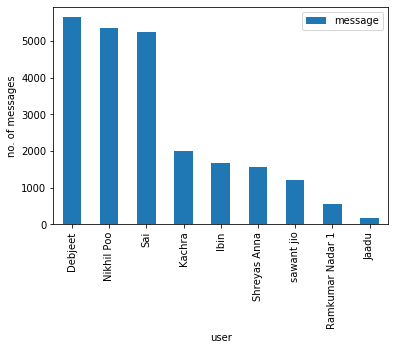

In [12]:
# plot of most active member throughout the years

import matplotlib.pyplot as plt
x.plot(kind="bar")
plt.xticks(rotation=90)
plt.ylabel("no. of messages")

- The above graph displays the most active behaviour of the group members.

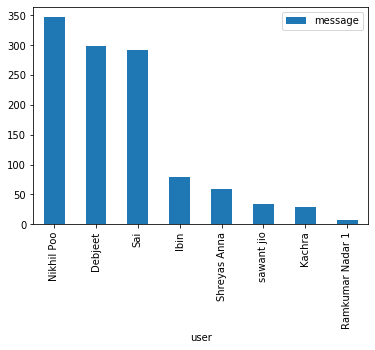

In [13]:
# most active during weekend
weekends=g_chat[(g_chat["Day"]== "Sun") | (g_chat["Day"]== "Sat")].pivot_table(index="user",values="message",aggfunc=np.size).sort_values(by="message",ascending=False)
weekends.plot(kind="bar")

- On the basis of the group chat data analysis Debjeet is the most active person during weekends followed by a close margin call by Sai and Nikhil Poo.

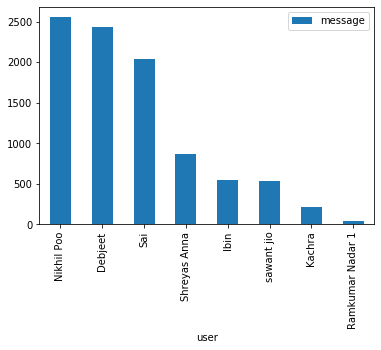

In [14]:
# most active weekdays
days=["Mon","Tue","Wed","Thu","Fri"]
weekdays=g_chat[(g_chat["Day"].isin(days))].pivot_table(index="user",values="message",aggfunc=np.size).sort_values(by="message",ascending=False)
weekdays.plot(kind="bar")

- According to the txt analysis Nikhil Poojary is most active person in the group during weekdays followed by Debjeet and Sai. 

## SLEEP CYCLE OF SAIKIRAN :
- The  graph says that normal sleep cycle of saikiran is from 2am to 630am
- Also he is most active in the duration from 11:00 to 19:00

Text(0.5, 0, 'saikiran active hours')

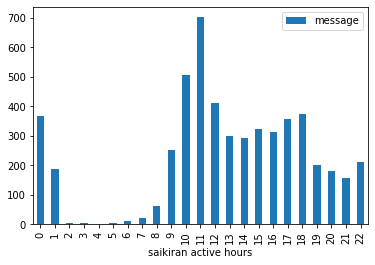

In [15]:
# active hours of saikiran on whatsapp.

sai_active_hours=g_chat[g_chat["user"]=="Sai"].pivot_table(index="time",values="message",aggfunc=np.size).reset_index()
sai_active_hours.plot(kind="bar")
plt.xlabel("saikiran active hours")

Text(0.5, 0, "Nikhil's active hours")

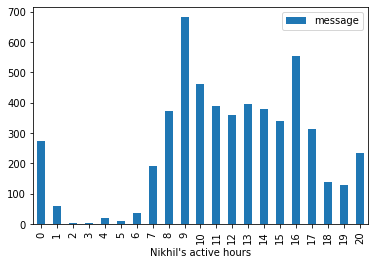

In [40]:
# Nikhil active hours on whatsapp.

nik_active_hours=g_chat[g_chat["user"]=="Nikhil Poo"].pivot_table(index="time",values="message",aggfunc=np.size).reset_index()
nik_active_hours.plot(kind="bar")
plt.xlabel("Nikhil's active hours")

- The above graph says that normal sleep cycle of saikiran is from 2am to 630am
- Also he is most active in the duration from 11:00 to 19:00

In [17]:
# messages on an average on weekdays

days=["Mon","Tue","Wed","Thu","Fri"]
g_chat[(g_chat["Day"].isin(days)) & (g_chat["user"]== "Nikhil Poo")].pivot_table(index="user",values="Day",aggfunc=np.size)/len("Day")

,Day
user,
Nikhil Poo,851.0


- On an average nikhil does 244 messages on weekdays.

In [18]:
# messages on an average on weekends

day=["Sun","Sat"]
users= ["Nikhil Poo","Sai","Shreyas Anna"]
g_chat[(g_chat["Day"].isin(day)) & (g_chat["user"].isin(users))].pivot_table(index="user",values="Day",aggfunc=np.size)/len("Day")


,Day
user,
Nikhil Poo,115.666667
Sai,97.333333
Shreyas Anna,19.666667


- Above people with no. of messages on an average on weekends. 

In [19]:
# adding column word_coiunt which will consist of the word count of users in a particular message.

g_chat["word_count"]=g_chat["message"].str.split(" ").apply(lambda x: len(x))

In [20]:
# users sorted on the basis of the words they have used.

g_chat.pivot_table(index= "user",values ="word_count",aggfunc=sum).sort_values(by="word_count")

,word_count
user,
Jaadu,490
sawant jio,3442
Ramkumar Nadar 1,3598
Shreyas Anna,6214
Ibin,7565
Kachra,11894
Nikhil Poo,15467
Debjeet,18412
Sai,18607


In [32]:
# using nltk library to collect the words from the sentences and then making a list of the words.

import nltk
nltk.download('punkt')
words = nltk.word_tokenize("".join(g_chat.message))


import re
new_words=[]
for i in words:
    # Substituting pattern with " " and saving as a string
    x= re.sub("[^a-zA-Z]",repl=" ",string=i)
    x=x.lower().strip()
    new_words.append(x)

WORDS=[]    
for i in new_words:
    if i!="":
        WORDS.append(i)

[nltk_data] Downloading package punkt to C:\Users\Debjeet
[nltk_data]     Das\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


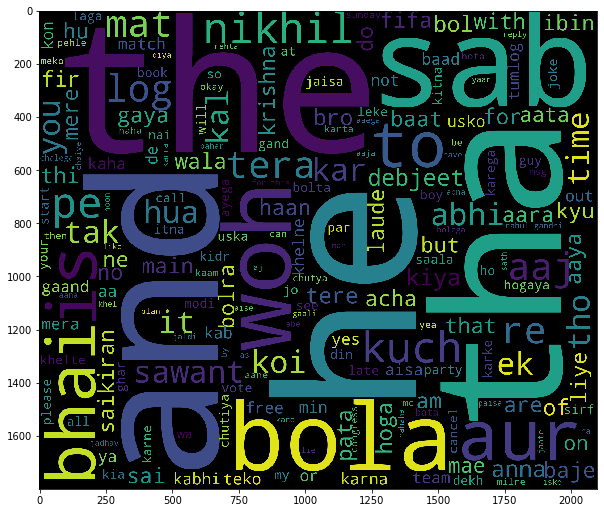

In [39]:
# Creating a single big_string wich will be used for generating the wordcloud
big_string = " ".join(WORDS)

# deriving the stopwords
Stopwrds =["me","Kya","toh","nhi","ko","tu","nahi","hi","ki","ka","bhi","hai","bc","media","omitted","in","se","mai","ye","ke","ni","na"]

# creating wordcloud
wordcloud = WordCloud(stopwords=Stopwrds , width=700,height=600,scale=3).generate(big_string)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)